### Histogram ve Yoğunluk Çaprazlamalar

*Çaprazlamaki temel hedef : Hedef değişken üzerinde diğer değişkenlerin etkisini daha detaylı bir şekilde incelemektir. Bu şekilde hangi değişkenin hedef değişken üzerinde ne kadar etkili olduğunu görebiliyoruz.*

In [1]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='price', ylabel='Density'>

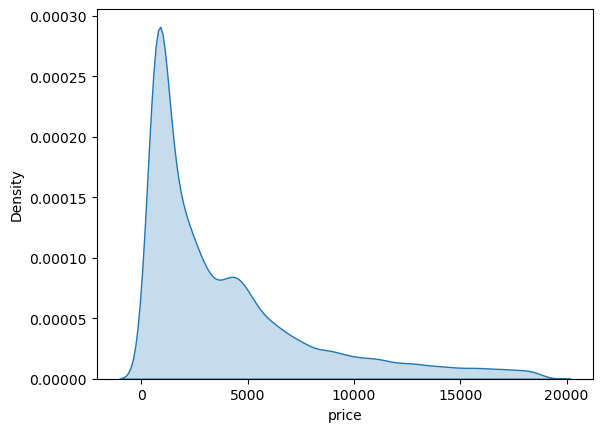

In [2]:
sns.kdeplot(df.price, fill = True)

*"Price" adlı hedef değişkenimizi "cut" adlı kategorik değişkenin sınıfları ile çaprazlama işlemi yapmak için aşağıdaki gibi bir fonksiyon yazabiliriz:*

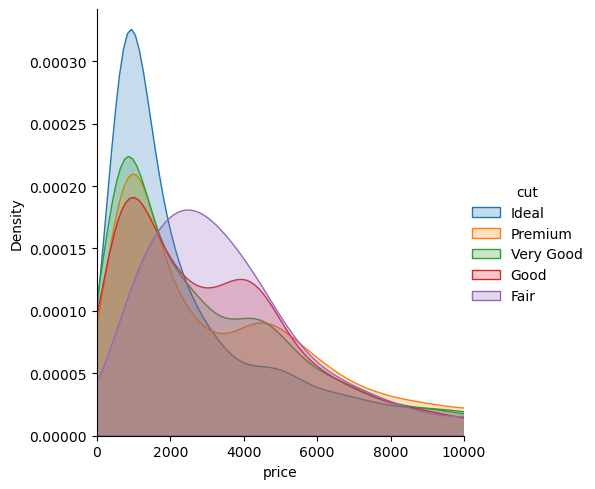

In [3]:
(sns.
 FacetGrid(df,
               hue = "cut",
               height = 5,
               xlim = (0, 10000))
 .map(sns.kdeplot, "price", fill = True)
 .add_legend()
)

*Yukarıdaki grafiğe bakarak aslında elmas kalitesi ile fiyat arasındaki ilişkinin her zaman doğrusal olmadığını görüyoruz. Çaprazlama bu yüzden önemlidir. Böyle bir işlem yapmasaydık ve önceki grafiklere odaklansaydık,'elmas kalitesi arttıkça fiyat da her zaman artar' gibi yüzeysel bir sonuç çıkarabilirdik. Bu da daha sonra model eğitimi sırasında tutarsızıklarla karşılaşmamıza sebep olabilirdi.*

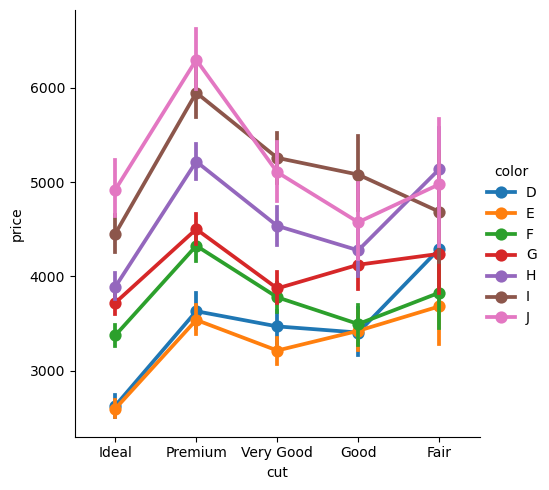

In [4]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df)

*"cut" kategorik değişkeninin "ideal" sınıfında "color" kategorik değişkeninin sınıflarının (renklerin) dağılıyor olması ve bu noktaların birbirinden uzak oluyor olması; Bu noktaların bilgi taşıdığı anlamına geliyor. Aynı sınıf içerisinde farklı renklere sahip elmasların fiyatlarında da farklılık olduğunu görebiliyoruz.Fakat bu her zaman geçerli değil. Örneğin "ideal" sınıfındaki mavi ve turuncu elmasların fiyatlarının hemen hemen aynı olduğunu görüyoruz.Burada bir ayırt edicilik yok.*